This notebook includes experiments with regular expressions for various shopping related tasks like:
- extracting specs from product titles (eg: 15 GB, size S/L/XL/etc., shoe size 7/8/9/etc.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re, json

In [2]:
# amazon products 2023 dataset: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset
# full_pdf = pd.read_csv('../../datasets/shopping/local/AmazonProducts2023/All Electronics.csv')
full_pdf = pd.read_csv('../../datasets/shopping/local/AmazonProducts2023/dataset/Amazon-Products.csv')
blocked_words = ['innerwear', 'nightwear']
full_pdf = full_pdf[full_pdf['main_category'].apply(lambda x: not any([re.search(word, x, re.IGNORECASE) for word in blocked_words]))]
full_pdf = full_pdf[full_pdf['sub_category'].apply(lambda x: not any([re.search(word, x, re.IGNORECASE) for word in blocked_words]))]
full_pdf

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


,main_category,count
0,accessories,116141
17,"tv, audio & cameras",68659
10,men's clothing,57504
11,men's shoes,57456
18,women's clothing,57408
1,appliances,33096
15,stores,32903
6,home & kitchen,14568
9,kids' fashion,13488
14,sports & fitness,12648


<AxesSubplot: ylabel='count'>

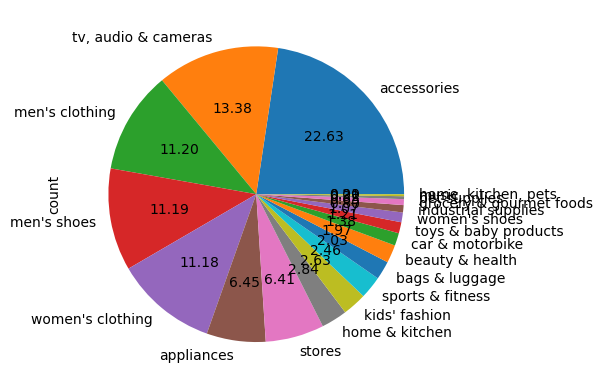

In [3]:
# show pie chart of main categories
display(full_pdf.groupby('main_category')[['name']].count().reset_index().rename(columns={'name': 'count'}).sort_values('count', ascending=False).head(10))
full_pdf['main_category'].value_counts().plot.pie(autopct='%.2f')

,sub_category,count
0,men's clothing -> Jeans,19200
1,men's clothing -> Shirts,19200
4,men's shoes -> Formal Shoes,19200
5,men's shoes -> Sports Shoes,19200
8,women's clothing -> Western Wear,19200
6,women's clothing -> Clothing,19152
2,men's clothing -> T-shirts & Polos,19104
3,men's shoes -> Casual Shoes,19056
7,women's clothing -> Ethnic Wear,19056


<AxesSubplot: ylabel='count'>

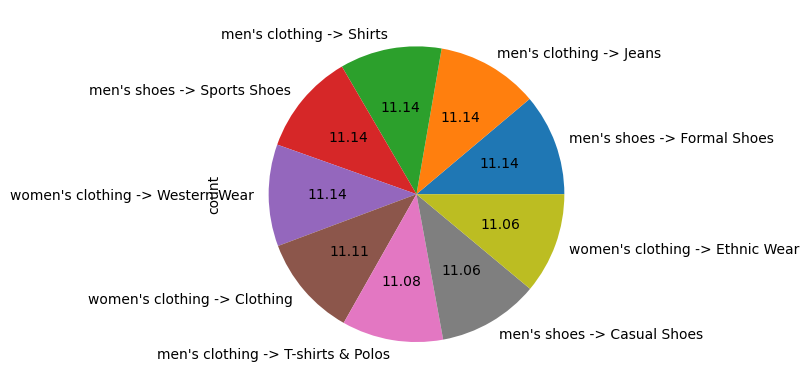

In [4]:
# show pie chart of sub categories
main_categories = ['accessories']
main_categories = ['men\'s clothing', 'women\'s clothing', 'accessories', 'men\'s shoes']
main_categories = ['tv, audio & cameras']
main_categories = ['men\'s clothing', 'women\'s clothing', 'men\'s shoes']
# main_category = 'men\'s shoes'
# main_category = 'appliances'
subcategories_pdf = full_pdf.query('main_category in @main_categories').copy()
subcategories_pdf['sub_category'] = subcategories_pdf['main_category'] + ' -> ' + subcategories_pdf['sub_category']
display(subcategories_pdf.groupby('sub_category')[['name']].count().reset_index().rename(columns={'name': 'count'}).sort_values('count', ascending=False).head(10))
subcategories_pdf['sub_category'].value_counts().plot.pie(autopct='%.2f')

In [5]:
# random products
print (json.dumps(subcategories_pdf.query('sub_category != "Headphones"').sample(50)['name'].to_list(), indent=2))

[
  "Ayukta Women's Rayon Anarkali Kurti",
  "PdlPrint Men's Regular Fit Pink Floyd Dark Side of The Moon Album Merchandise Graphic Printed T-Shirt",
  "U.S. POLO ASSN. Boy's Slim Jeans (UKJEN0263_Dark Blue",
  "SLOTH CLOTH Demon Slayer Compliation",
  "TeeWink Stylish Graphics Printed Regular fit Indian Flag Tricolor T-Shirts with Neon Orange Zip | Unisex Premium Casual We...",
  "Park Avenue Men's Slim Fit Shirt",
  "Colt Men's Skinny Jeans (CLMEPDN20043B23_Blue Super Ston_34)",
  "Jack & Jones Men's 12232622 Tawny Loafer-40 (143296103-Tawny Olive)",
  "Blue Horse Fashion Casual Driving Shoes for Men",
  "Shoefly Sports Walking and Running Shoes for Kids Combo(O)-1705-3105-1208(Multicolor-Pack of 3)",
  "SMAN Men's Polo T-Shirt Regular fit, Polycotton, Half Sleeve, with Pocket Combo Pack of 2 | Navy-Blue, Sky-Blue |",
  "VIV Men's Chelsea Boots",
  "Campus Men's Black & Burgundy Running Shoe",
  "U.S. POLO ASSN. Men's Slim Jeans (UDJENO0627_Blue",
  "Saanchi Ecommerce Women's Georget

In [6]:
def extract_specs(product_name):
  # Regular expression to match any word before "Fit"
  fit_regex = r"\b(\w+)\s+Fit\b"
  fit_match = re.search(fit_regex, product_name, re.IGNORECASE)
  fit = fit_match.group(0) if fit_match else None
  residual = product_name.replace(fit, '[FIT]') if fit else product_name

  # sleeve: regex to match words like sleeveless, sleeves, sleeve, etc.
  sleeve_regex = r"(sleeveless)|((\w+)(\s+|(\s*-\s*))?sleeves?(\b|$))"
  sleeve_match = re.search(sleeve_regex, residual, re.IGNORECASE)
  sleeve = sleeve_match.group(0) if sleeve_match else None
  residual = residual.replace(sleeve, '[SLEEVE]') if sleeve else residual

  # neck: regex to match words like round neck, v-neck, etc.
  neck_regex = r"((\w+)(\s+|\s*-\s*)?neck?(\b|$))"
  neck_match = re.search(neck_regex, residual, re.IGNORECASE)
  neck = neck_match.group(0) if neck_match else None
  residual = residual.replace(neck, '[NECK]') if neck else residual

  # gender: regex to match words like Men, Women, women's, for men, for women
  gender_regex = r"(\b(for\s+)?(women|men|girl|boy|unisex)(\'?s)?\b)"
  gender_match = re.search(gender_regex, residual, re.IGNORECASE)
  gender = gender_match.group(0) if gender_match else None
  residual = residual.replace(gender, '[GENDER]') if gender else residual

  # remove rest of the gender_regex matches too
  while True:
    match = re.search(gender_regex, residual, re.IGNORECASE)
    if not match:
      break
    residual = residual.replace(match.group(0), '[GENDER]')
  
  # rise: low rise, mid rise, high rise, etc.
  rise_regex = r"(\b(low|mid|high)\s*rise\b)"
  rise_match = re.search(rise_regex, residual, re.IGNORECASE)
  rise = rise_match.group(0) if rise_match else None
  residual = residual.replace(rise, '[RISE]') if rise else residual

  # broad_product_type: shirt, t-shirt, jeans, pants, kurt(a|i), top, shoes
  broad_product_type_regex = r"(\b(shirt|t(\s|-)?shirt|jean|pant|kurt(a|i)|((sports?\s*)?shoe))s?\b)"
  broad_product_type_match = re.search(broad_product_type_regex, residual, re.IGNORECASE)
  broad_product_type = broad_product_type_match.group(0) if broad_product_type_match else None
  residual = residual.replace(broad_product_type, '[TYPE]') if broad_product_type else residual

  # product_sub_type: running shoes, casual shoes, formal shoes, etc. modelled as <word> [TYPE]
  product_sub_type_regex = r"(\b(\w+)(\s+|(\s*-\s*))?\[TYPE\])"
  product_sub_type_match = re.search(product_sub_type_regex, residual, re.IGNORECASE)
  product_sub_type = product_sub_type_match.group(0) if product_sub_type_match else None
  if product_sub_type:
      product_sub_type = product_sub_type.replace('[TYPE]', '').strip()
      if product_sub_type[0]=='[' and product_sub_type[-1]==']':
          product_sub_type = None
  residual = residual.replace(product_sub_type, '[SUBTYPE]') if product_sub_type else residual

  specs = {
    # 'RAM': ram_pattern.search(product_name).group(1) if ram_pattern.search(product_name) else None,
    'Fit': fit,
    'Sleeve': sleeve,
    'Neck': neck,
    'Gender': gender,
    'ProductType': broad_product_type,
    'ProductSubType': product_sub_type,
    'Rise': rise,
    'Residual': residual
  }
  return specs

pdf = subcategories_pdf.copy()
pdf['specs'] = pdf['name'].apply(extract_specs)

In [7]:
# extract brands from the residuals
# step-1: keep only prefixes before artificial tags
# step-2: enumerate are prefixes of these prefixes and count how many times they occur
# step-3: keep only prefixes that end in a word boundary and appear >= k times in the corpus. These are the brands

def extract_prefix(s):
    synthetic_tags = ['[FIT]', '[SLEEVE]', '[NECK]', '[GENDER]', '[RISE]', '[TYPE]', '[SUBTYPE]']
    for tag in synthetic_tags:
        s = s.split(tag)[0]
    return s.strip().lower()

# training phase
prefixes = pdf['specs'].apply(lambda x: x['Residual'] if x['Residual'] else '')\
    .apply(lambda x: extract_prefix(x))

prefix_to_count = {}
for prefix in prefixes:
    tokens = list(filter(lambda x: x!='', prefix.split()))
    for i in range(len(tokens)):
        candidate = ' '.join(tokens[:i+1])
        prefix_to_count[candidate] = prefix_to_count.get(candidate, 0) + 1

# inference phase
def stamp_brand(residual, positive_count_threshold=3):
    tokens = residual.split()
    prefix_idx_to_count = []
    for i in range(len(tokens)):
        candidate = ' '.join(tokens[:i+1])
        prefix_idx_to_count.append(prefix_to_count.get(candidate.lower(), 0))

    count_drops = [0]
    for i in range(1, len(prefix_idx_to_count)):
        count_drops.append(prefix_idx_to_count[i-1] - prefix_idx_to_count[i])

    biggest_drop_idx = count_drops.index(max(count_drops))
    potential_brand = ' '.join(tokens[:biggest_drop_idx])
    if prefix_to_count.get(potential_brand.lower(), 0) >= positive_count_threshold:
        return potential_brand
    return None

def add_brand_to_specs(specs):
    residual = specs['Residual']
    specs['Brand'] = stamp_brand(residual)
    if specs['Brand']:
        specs['Residual'] = residual.replace(specs['Brand'], '[BRAND]')
    return specs

pdf['specs'] = pdf['specs'].apply(add_brand_to_specs)

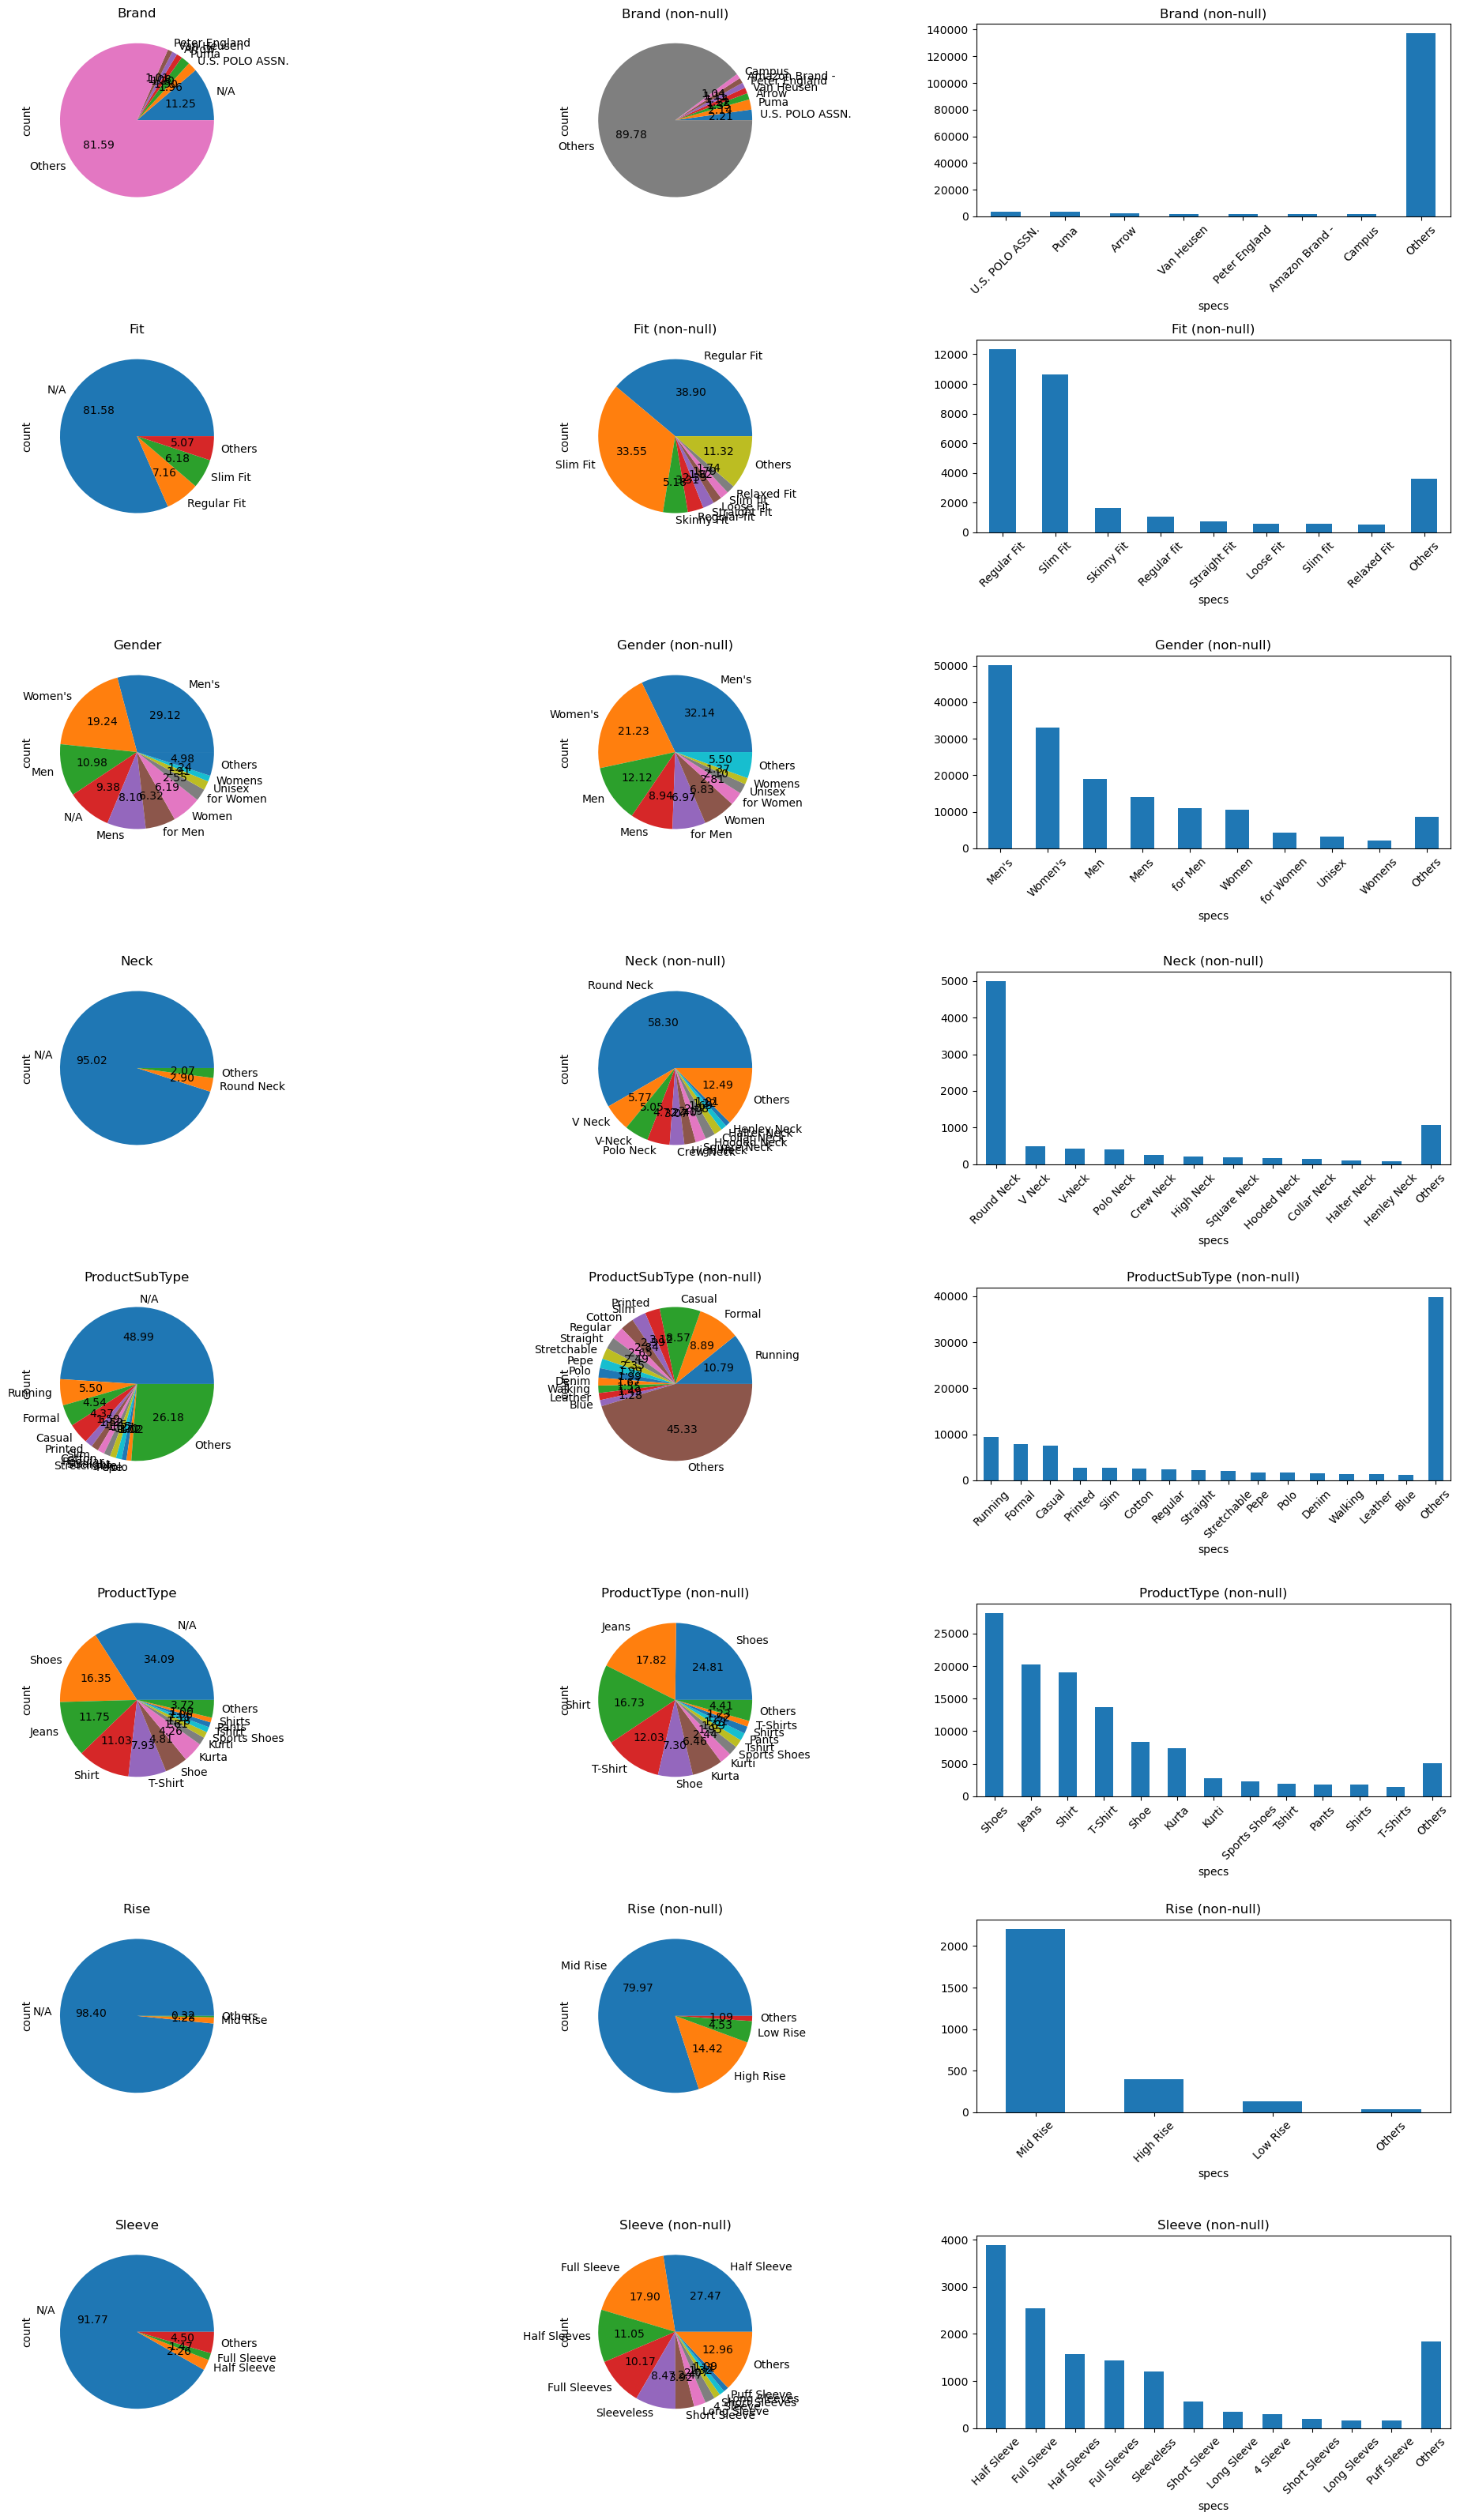

In [8]:
def club_small_values(pie_chart_data, small_value_percent=0.01):
    full_count = pie_chart_data.sum()
    pie_chart_data = pie_chart_data[pie_chart_data > small_value_percent*full_count]
    pie_chart_data['Others'] = full_count - pie_chart_data.sum()
    return pie_chart_data

spec_keys = sorted(list(set([key for specs in pdf['specs'] for key in specs if key!='Residual'])))
n_rows = len(spec_keys)
fill_null = lambda x: x if x else 'N/A'
fig, axs = plt.subplots(n_rows, 3, figsize=(20, 4*n_rows))
for i, key in enumerate(spec_keys):
    spec_values = pdf['specs'].apply(lambda x: fill_null(x.get(key, None)))
    # show a pie chart of the distribution of the key
    ax = axs[i, 0] if n_rows > 1 else axs[0]
    club_small_values(spec_values.value_counts())\
        .plot.pie(ax=ax, autopct='%.2f', title=key)

    # next, show pie chart of non-null values
    ax = axs[i, 1] if n_rows > 1 else axs[1]
    club_small_values(spec_values[spec_values != 'N/A'].value_counts()).plot.pie(ax=ax, autopct='%.2f', title=f'{key} (non-null)')

    # finally, show raw counts of non-null values
    ax = axs[i, 2] if n_rows > 1 else axs[2]
    club_small_values(spec_values[spec_values != 'N/A'].value_counts()).plot.bar(ax=ax, title=f'{key} (non-null)', rot=45)

plt.tight_layout()
plt.show()


In [12]:
# compare residuals with original for sample products
with pd.option_context('display.max_colwidth', None):
    xpdf = pdf.copy()#.query('main_category == "men\'s clothing"')
    xpdf['residual'] = xpdf['specs'].apply(lambda x: x['Residual'])
    xpdf['specs'] = xpdf['specs'].apply(lambda x: {k: v for k, v in x.items() if v is not None and k!='Residual'})
    data = xpdf[['name', 'residual', 'specs', 'main_category', 'sub_category']].sample(40)
    # data = data[data['name'].apply(lambda n: "size" in n.lower())]
    display(data)

,name,residual,specs,main_category,sub_category
453092,Impakto Mens Grey & Black Sports Shoe,[BRAND] [GENDER] Grey & [SUBTYPE] [TYPE],"{'Gender': 'Mens', 'ProductType': 'Sports Shoe', 'ProductSubType': 'Black', 'Brand': 'Impakto'}",men's shoes,men's shoes -> Sports Shoes
136765,KIPEK Women's Cotton Buta Print Anarkali Kurta,[BRAND] [GENDER] Cotton Buta Print [SUBTYPE] [TYPE],"{'Gender': 'Women's', 'ProductType': 'Kurta', 'ProductSubType': 'Anarkali', 'Brand': 'KIPEK'}",women's clothing,women's clothing -> Ethnic Wear
148733,Soch Women Pink,[BRAND] [GENDER] Pink,"{'Gender': 'Women', 'Brand': 'Soch'}",women's clothing,women's clothing -> Ethnic Wear
456406,Campus Men's Elfin Running Shoes,[BRAND] [GENDER] Elfin [SUBTYPE] [TYPE],"{'Gender': 'Men's', 'ProductType': 'Shoes', 'ProductSubType': 'Running', 'Brand': 'Campus'}",men's shoes,men's shoes -> Sports Shoes
86464,Wolven Handmad Men's Polo Brown Suede Leather Loafers with Black Rubber Sole,[BRAND] Handmad [GENDER] Polo Brown Suede Leather Loafers with Black Rubber Sole,"{'Gender': 'Men's', 'Brand': 'Wolven'}",men's shoes,men's shoes -> Casual Shoes
120962,Shopping Station Women's Satin Printed Maxi Nighty,[BRAND] Station [GENDER] Satin Printed Maxi Nighty,"{'Gender': 'Women's', 'Brand': 'Shopping'}",women's clothing,women's clothing -> Clothing
85512,Skechers Mens Elite Flex - Sneaker,[BRAND] [GENDER] Elite Flex - Sneaker,"{'Gender': 'Mens', 'Brand': 'Skechers'}",men's shoes,men's shoes -> Casual Shoes
463076,"SWIGGY Sports Shoes for Men|Grey for Running,Walking,Gym and Hiking Shoes ORI-1852","[SUBTYPE] [TYPE] [GENDER]|Grey for Running,Walking,Gym and Hiking Shoes ORI-1852","{'Gender': 'for Men', 'ProductType': 'Sports Shoes', 'ProductSubType': 'SWIGGY'}",men's shoes,men's shoes -> Sports Shoes
93632,Red Chief Mens Casual Shoes Boat Shoe,[BRAND] Chief [GENDER] [SUBTYPE] [TYPE] Boat Shoe,"{'Gender': 'Mens', 'ProductType': 'Shoes', 'ProductSubType': 'Casual', 'Brand': 'Red'}",men's shoes,men's shoes -> Casual Shoes
463547,LANCER Mens ACTIVE-105 Black Running Shoe - 8 UK (ACTIVE-105BLK-ORG-8),[BRAND] [GENDER] ACTIVE-105 Black [SUBTYPE] [TYPE] - 8 UK (ACTIVE-105BLK-ORG-8),"{'Gender': 'Mens', 'ProductType': 'Shoe', 'ProductSubType': 'Running', 'Brand': 'LANCER'}",men's shoes,men's shoes -> Sports Shoes


In [15]:
# save the processed data
pdf.to_csv('../../datasets/shopping/local/AmazonProducts2023/model_outputs/re_based_spec_attr_extraction.tsv', index=False, sep='\t')


AMERICAN CREW Women's Slim Fit Jeans
Potential brand: AMERICAN
Prefix count: 742


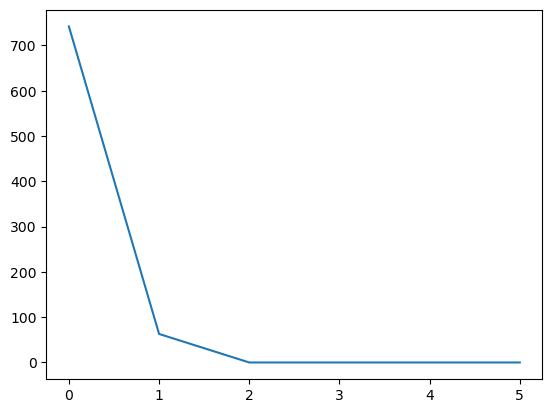

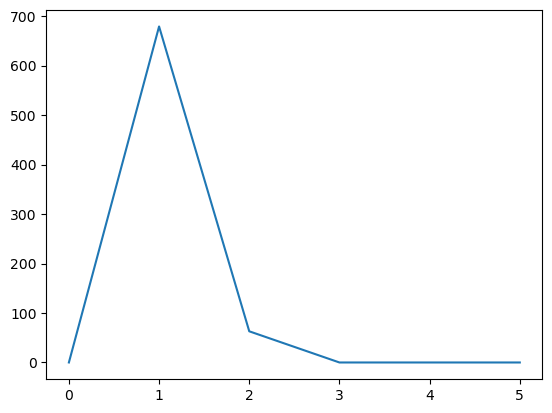

In [20]:
s = "Campus Sutra Men Checks Stylish Full Sleeve Casual Blazer's"
s = "Priyali's Collection Cotton Lycra Leggings Combo of 4	"
s = "AMERICAN CREW Women's Slim Fit Jeans"
print (s)
tokens = s.split()
prefix_idx_to_count = []
for i in range(len(tokens)):
    candidate = ' '.join(tokens[:i+1])
    prefix_idx_to_count.append(prefix_to_count.get(candidate.lower(), 0))

count_drops = [0]
for i in range(1, len(prefix_idx_to_count)):
    count_drops.append(prefix_idx_to_count[i-1] - prefix_idx_to_count[i])

biggest_drop_idx = count_drops.index(max(count_drops))
potential_brand = ' '.join(tokens[:biggest_drop_idx])
print (f'Potential brand: {potential_brand}')
print (f"Prefix count: {prefix_to_count.get(potential_brand.lower(), 0)}")

plt.plot(prefix_idx_to_count)
plt.show()

plt.plot(count_drops)